# NLP model building

Purpose : Building a model able to do a classification on sentences

Authors : Clement Pierson & Benoît Pierson

## 0 - Interesting links

* https://www.youtube.com/playlist?list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S
* https://www.youtube.com/watch?v=Y_hzMnRXjhI&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=3
* https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/#:~:text=Keras%20offers%20an%20Embedding%20layer%20that%20can%20be,using%20the%20Tokenizer%20API%20also%20provided%20with%20Keras.
* 
https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb#scrollTo=3u8UB0MCkZ5N
* https://towardsdatascience.com/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966

## 1 - Libraries import

In [215]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import CSVLogger

## 2 - Variables definition

In [206]:
nb_train = 20000 # Number of training examples considered
nb_valid = 5000 # Number of validation examples considered
vocab_size = 10000 # Number of words to be considered regarding on their frequency
max_length = 100 # Maximum length of a sentence --> Size of entrance of neural network
embedding_dim = 32 # Embedding dimension for vector representation of words
nb_epochs = 30 # Number of epochs for training

## 3 - Training JSON file reading

In [218]:
training_examples = []
URL = []
X = [] # sentences
Y = [] # sarcastic or not

for line in open('sarcasm_training_dataset.json', 'r'):
    training_examples.append(json.loads(line))

for item in training_examples:
    X.append(item['headline'])    
    Y.append(item['is_sarcastic'])
    URL.append(item['article_link'])

## 4 - Training / Test dataset splitting

In [208]:
X_train = X[0:nb_train]
Y_train = Y[0:nb_train]

X_valid = X[nb_train:nb_train + nb_valid]
Y_valid = Y[nb_train:nb_train + nb_valid]

X_test = X[nb_train + nb_valid:]
Y_test = Y[nb_train + nb_valid:]

## 5 - Sentences tokenization

In [209]:
tokenizer = Tokenizer(oov_token = "<OOV>", num_words = vocab_size) # Strategy for considering Out Of Vocabulary words
tokenizer.fit_on_texts(X_train) # Only considering words in training examples
word_index = tokenizer.word_index

# Pre-processing training set:
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_length, padding = 'post', truncating = 'post')

# Pre-processing validation set:
X_valid = tokenizer.texts_to_sequences(X_valid)
X_valid = pad_sequences(X_valid, maxlen = max_length, padding = 'post', truncating = 'post')

# Pre-processing test set:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_length, padding = 'post', truncating = 'post')

## 6 - Model architecture definition

In [210]:
model = tensorflow.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [211]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 25        
Total params: 320,817
Trainable params: 320,817
Non-trainable params: 0
_________________________________________________________________


## 7 - Model training

In [212]:
callback_list = []

callback_list.append(EarlyStopping(monitor = 'val_accuracy', patience = 5, min_delta = 0.0, mode = 'max')) # Callback to ensure parameters update in accordance with test accuracy improvement
callback_list.append(CSVLogger('training_log.csv')) # Callback to get a feedback

In [213]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

history = model.fit(X_train, Y_train, epochs = nb_epochs, validation_data = (X_valid, Y_valid), verbose = 2, callbacks = callback_list)

Epoch 1/30
625/625 - 5s - loss: 0.6303 - accuracy: 0.6314 - val_loss: 0.4805 - val_accuracy: 0.7946
Epoch 2/30
625/625 - 5s - loss: 0.3738 - accuracy: 0.8518 - val_loss: 0.3620 - val_accuracy: 0.8480
Epoch 3/30
625/625 - 5s - loss: 0.2811 - accuracy: 0.8884 - val_loss: 0.3396 - val_accuracy: 0.8586
Epoch 4/30
625/625 - 4s - loss: 0.2354 - accuracy: 0.9091 - val_loss: 0.3371 - val_accuracy: 0.8594
Epoch 5/30
625/625 - 4s - loss: 0.1982 - accuracy: 0.9245 - val_loss: 0.3671 - val_accuracy: 0.8416
Epoch 6/30
625/625 - 4s - loss: 0.1742 - accuracy: 0.9342 - val_loss: 0.3623 - val_accuracy: 0.8530
Epoch 7/30
625/625 - 5s - loss: 0.1531 - accuracy: 0.9437 - val_loss: 0.3858 - val_accuracy: 0.8548
Epoch 8/30
625/625 - 4s - loss: 0.1362 - accuracy: 0.9514 - val_loss: 0.4223 - val_accuracy: 0.8388
Epoch 9/30
625/625 - 4s - loss: 0.1199 - accuracy: 0.9576 - val_loss: 0.4251 - val_accuracy: 0.8520


## 8 - Model training analysis

### 8.1 - Accuracy & Loss plots

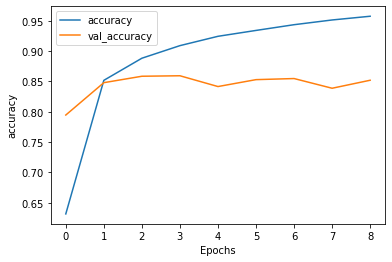

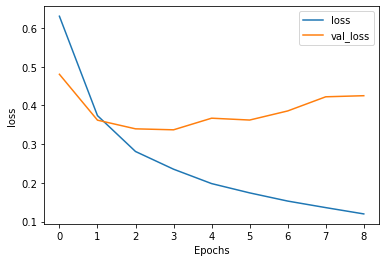

In [214]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy") 
plot_graphs(history, "loss")

### 8.2 - Loading log file information

In [217]:
df_log = pd.read_csv('training_log.csv')
df_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.63145,0.630342,0.7946,0.480460
1,1,0.85185,0.373783,0.8480,0.362030
2,2,0.88835,0.281090,0.8586,0.339609
3,3,0.90910,0.235366,0.8594,0.337096
4,4,0.92450,0.198215,0.8416,0.367086
5,5,0.93420,0.174233,0.8530,0.362306
6,6,0.94365,0.153082,0.8548,0.385803
7,7,0.95145,0.136189,0.8388,0.422345
8,8,0.95760,0.119911,0.8520,0.425147
